# ex4

In [1]:
from math import pi, sqrt
from IPython.display import display

from qiskit import Aer
from qiskit import assemble
from qiskit import QuantumCircuit
#from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex

import warnings
import matplotlib.cbook
# https://stackoverflow.com/questions/24502500/python-matplotlib-getting-rid-of-matplotlib-mpl-warning
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
#FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
psi_zero = [1.+0.j, 0.+0.j] # |ψ⟩ = |0⟩
psi_one = [0.+0.j, 1.+0.j] # |ψ⟩ = |1⟩
psi_plus = [1/sqrt(2), +1/sqrt(2)]  # |ψ⟩ = |+⟩
psi_minus = [1/sqrt(2), -1/sqrt(2)]  # |ψ⟩ = |-⟩
psi_i_plus = [1/sqrt(2), +1.j/sqrt(2)]  # |ψ⟩ = |i⟩
psi_i_minus = [1/sqrt(2), -1.j/sqrt(2)]  # |ψ⟩ = |-i⟩

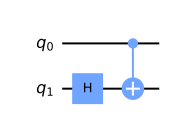

<IPython.core.display.Math object>

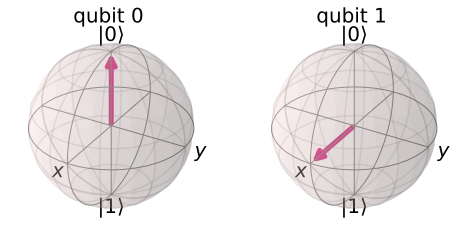

In [6]:
qc = QuantumCircuit(2)

# ENCODE
# defatuls

# COMPUTE
## put qubit 1 in state |+⟩
#qc.h(0)
#qc.cnot(0, 1)

# put qubit 1 in state |+⟩ then cnot
qc.h(1)
qc.cnot(0, 1)

# EXTRACT, MEASURE
# n/a

# VISUALIZE
# circuit
display(qc.draw())

qobj = assemble(qc)
## unitary matrix
#usim = Aer.get_backend('unitary_simulator')
#unitary_matrix = usim.run(qobj).result().get_unitary()
#array_to_latex(unitary_matrix, pretext="\\text{Circuit} = ")

# statevector
svsim = Aer.get_backend('statevector_simulator')
statevector = svsim.run(qobj).result().get_statevector()
array_to_latex(statevector, pretext="\\text{Statevector} = |ψ⟩ =", precision=1)

# Bloch sphere
display(plot_bloch_multivector(statevector))

# ex4

In this exercise, you will investigate the characteristic energies of the transmon qubit by performing spectroscopy with a real IBM Quantum system. the ratio between the Josephson energy and charging energy 𝐸𝐽/𝐸𝑐 is the key to solving the charge noise problem of its predecessor, the Cooper Pair Box qubit.

A team of physicists based at Yale debuted a new type of qubits based on superconducting circuits called transmon qubits. 

이호준 May 21st at 2:25 PM
What is anharmonicity means at ex.4? Is it f12 - f01?
white_check_mark
eyes
raised_hands




1 reply

Areeq Hasan  3 days ago
yup

021


Igor Tokarev May 21st at 2:44 PM
In 4 I have this graphic. I think it's right, but have error: The frequency provided is not within the expected range for the qubit specified. Why it's wrong? (edited) 
image.png 
image.png


11 replies

Siddhartha Morales  3 days ago
make your fit smoother

이호준  3 days ago
Is the graph scaled? I just changed amp_guess and C significantly, but the graph doesn’t changed

Areeq Hasan  3 days ago
the lorentzian peak should be at a lower drive freq (around 4.90) and yield a higher IQ signal (2e7 au) (edited) 

Areeq Hasan  3 days ago
also there was some noise around the edges of the peak so the fit doesnt need to be perfect

Areeq Hasan  3 days ago
make sure you set the right frequencies for the x_pulses

이호준  3 days ago
I think it’s freq and freq+anharm. isn’t it?

Areeq Hasan  3 days ago
close but not quite, your expression for the second freq is right (the |1> --> |2> transition freq we're looking for), the first freq (|0> --> |1> transition freq) is a constant we've already calculated in an earlier part of the notebook (edited) 
:thank-you:
3


이호준  3 days ago
Oh, thank you!
:party-blob:
3


이호준  3 days ago
Thank you! I solved it!
:party-blob:
2


Igor Tokarev  3 days ago
Thanks!
:party-blob:
1


Mohit Mittal  3 days ago
how we can make the curve smoother?

Mohit Mittal May 21st at 4:27 PM
what should be the frequencies in ex4? for 1 to 2 its freq+anharmn but for 0 to 1 should i use freq?
white_check_mark
eyes
raised_hands




1 reply

Areeq Hasan  3 days ago
https://qiskit.slack.com/archives/C021UTFN9GE/p1621606396274100?thread_ts=1621604685.259100&cid=C021UTFN9GE
Areeq Hasan
close but not quite, your expression for the second freq is right (the |1> --> |2> transition freq we're looking for), the first freq (|0> --> |1> transition freq) is a constant we've already calculated in an earlier part of the notebook

Mohit Mittal May 21st at 4:27 PM
Also how to make the curve smoother?
white_check_mark
eyes
raised_hands




6 replies

Areeq Hasan  3 days ago
https://qiskit.slack.com/archives/C021UTFN9GE/p1621605300263300?thread_ts=1621604685.259100&cid=C021UTFN9GE
Areeq Hasan
also there was some noise around the edges of the peak so the fit doesnt need to be perfect
From a thread in #iqc2021 | May 21st | View reply

Mohit Mittal  3 days ago
so how can we avoid it? Any hints?

Areeq Hasan  3 days ago
you shouldnt need to if you have the right frequencies

Areeq Hasan  3 days ago
as in, the grader accepts it

Mohit Mittal  3 days ago
ok i am trying.

Mohit Mittal  3 days ago
got it...Thankyou



Saasha Joshi May 21st at 6:25 PM
I'm trying pulses for exercise 4. In one of the samples, I received the following error: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
However, I don't know what this means. Can anyone explain the reason behind this error?
10 replies

Junye Huang:m:  3 days ago
Can you try to change the fitting parameter?

Junye Huang:m:  3 days ago
Which one are you trying to fit? Spec 01, Rabi or Spec 12?

Saasha Joshi  3 days ago
spec 12

Junye Huang:m:  3 days ago
If you are doing things right, the existing parameters should give good fit

Saasha Joshi  3 days ago
Will try and debug!

Junye Huang:m:  3 days ago
But you can try changing the amp_guess
:+1:
1


Arnav Arora  3 days ago
maybe try running on ibmq_jakarta a few times and try, i had the same problem, but in the third try i got the answer and it only differed by 0.002 in magnitude, i guess this is due to noise @Junye? (edited) 

Saasha Joshi  3 days ago
I had a wrong freq value. and tweaking few params worked!

Saasha Joshi  3 days ago
btw there isn't a score for ex 4, is there? (edited) 

Saasha Joshi  1 day ago
Just a follow up for any one refering this thread, the issue was due to a silly error of mine. The first pulse should have frequency of freq whereas the second pulse should have a variable/changing freq (given in the notebook itself).
The error occured due to me adding both the pulses with a variable frequency (which is wrong). (edited) 

By introducing a non-linear circuit element, the Josephson junction, the energy levels of the transmon qubit is modified (Fig. 2d). The energy levels are no longer equally spaced. Higher energy level spacing is smaller than those of lower energies.  

The anharmonicity 𝛿 is defined as the **energy difference** between |1⟩→|2⟩ and |0⟩→|1⟩

## Goal

Find |1⟩→|2⟩ transition frequency 𝑓12.

## Plan

(Tutorial) Find |0⟩→|1⟩ transition frequency 𝑓01 using spectroscopy (sweeping frequency).  
(Tutorial) Calibrate X-180 pulse amplitude using Rabi oscillation (sweeping amplitude).  
(Problem) Find |1⟩→|2⟩ transition frequency 𝑓12 using the calibrated X-180 pulse and spectroscopy (sweeping frequency).  

0->1 + Rabi??

In [ ]:

Bartu Bisgin Yesterday at 10:03 AM
for ex.4 should we just send a composite pulse of x and anharmonicity or one after the other?
white_check_mark
eyes
raised_hands




6 replies

Jeroen Winkel  1 day ago
i think you want to send them quickly after another so that the qubit doesn't have time to fall back to its position

Bartu Bisgin  1 day ago
i get something like this, which seems a good fit and in range but getting error on submission
ex4.png 
ex4.png



Jeroen Winkel  1 day ago
for me the curve was going downwards

Jeroen Winkel  1 day ago
did you put the correct frequency for both of the pulses? they should be differnnt i think

Bartu Bisgin  1 day ago
the first pulse is 0-1 anyways right we leave that as it is as freq, and the other one will just be the freq+anharmonicty to test the 2nd transition? or am i missing something?

Jeroen Winkel  1 day ago
idk what your code is like, but for me it was the problem that you have to reset the frequency everytime you go through the loop

In [ ]:


Saasha Joshi May 21st at 6:25 PM
I'm trying pulses for exercise 4. In one of the samples, I received the following error: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
However, I don't know what this means. Can anyone explain the reason behind this error?
10 replies

Junye Huang:m:  3 days ago
Can you try to change the fitting parameter?

Junye Huang:m:  3 days ago
Which one are you trying to fit? Spec 01, Rabi or Spec 12?

Saasha Joshi  3 days ago
spec 12

Junye Huang:m:  3 days ago
If you are doing things right, the existing parameters should give good fit

Saasha Joshi  3 days ago
Will try and debug!

Junye Huang:m:  3 days ago
But you can try changing the amp_guess
:+1:
1


Arnav Arora  3 days ago
maybe try running on ibmq_jakarta a few times and try, i had the same problem, but in the third try i got the answer and it only differed by 0.002 in magnitude, i guess this is due to noise @Junye? (edited) 

Saasha Joshi  3 days ago
I had a wrong freq value. and tweaking few params worked!

Saasha Joshi  3 days ago
btw there isn't a score for ex 4, is there? (edited) 

Saasha Joshi  2 days ago
Just a follow up for any one refering this thread, the issue was due to a silly error of mine. The first pulse should have frequency of freq whereas the second pulse should have a variable/changing freq (given in the notebook itself).
The error occured due to me adding both the pulses with a variable frequency (which is wrong). (edited) 



Saasha Joshi May 21st at 6:25 PM
I'm trying pulses for exercise 4. In one of the samples, I received the following error: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
However, I don't know what this means. Can anyone explain the reason behind this error?
10 replies

Junye Huang:m:  3 days ago
Can you try to change the fitting parameter?

Junye Huang:m:  3 days ago
Which one are you trying to fit? Spec 01, Rabi or Spec 12?

Saasha Joshi  3 days ago
spec 12

Junye Huang:m:  3 days ago
If you are doing things right, the existing parameters should give good fit
white_check_mark
eyes
raised_hands




Saasha Joshi  3 days ago
Will try and debug!

Junye Huang:m:  3 days ago
But you can try changing the amp_guess
:+1:
1


Arnav Arora  3 days ago
maybe try running on ibmq_jakarta a few times and try, i had the same problem, but in the third try i got the answer and it only differed by 0.002 in magnitude, i guess this is due to noise @Junye? (edited) 

Saasha Joshi  3 days ago
I had a wrong freq value. and tweaking few params worked!

Saasha Joshi  3 days ago
btw there isn't a score for ex 4, is there? (edited) 

Saasha Joshi  2 days ago
Just a follow up for any one refering this thread, the issue was due to a silly error of mine. The first pulse should have frequency of freq whereas the second pulse should have a variable/changing freq (given in the notebook itself).
The error occured due to me adding both the pulses with a variable frequency (which is wrong). (edited) 


Matthew Jurenka Today at 1:55 AM
Can someone give me a hint on ex4? I am pretty sure I am supposed to modify the frequency in some way but have no idea how




2 replies

Saesun Kim  19 hours ago
from example1 you know the frequency for the qubit 0 to 1, so use that information, scan the frequency  to get the second 1 to 2
:+1:
1


Jirayu Supasil  17 hours ago
I saw from other post and it work for me. I adjust anharmonicity_guess_GHz parameter.

Shilpa Mahato  30 minutes ago
Hi, what all have  you figured? I hope you understood you need o send two pulses?




Qingpeng Li  13 minutes ago
Like Shipa said, you just need two x_pulses. One from |0> to |1>, next one from |1> to |2>. You need to set two different frequencies for them (this is the hard part, try to figure out how to use Tutorial 1 result & anharmonicity formula correctly). (edited) 

Diogo Ramos  8 minutes ago
@Qingpeng Li so we don't use the x_pulse?

Qingpeng Li  4 minutes ago
Oh, actually I mean x_pulses, I wasn't reviewing the notebook carefully on GitHub...

Diogo Ramos  < 1 minute ago
And do we need to change anything in the spec_pulse?